# Penguins

Penguins are cool!

1. [Import Libraries](#1.-Import-Libraries)
2. [Load Data](#2.-Load-Data)
3. [EDA](#3.-EDA)
4. [Data Preprocessing](#4.-Data-Preprocessing)
5. [ML](#5.-ML)
   
   ...
7. [Compare Models](#6.-Compare-Models)
8. [Conclusion](#7.-Conclusion)

### 1. Import Libraries
[Back to Top](#Penguins) <br>

In [1]:
# # run this cell only once to install any packages we might not have yet, comment after the first run
# ! pip install jupyternotify
# %load_ext jupyternotify
# ! pip install pandas
# ! pip install matplotlib
# ! pip install seaborn

In [2]:
import numpy as np

import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams["axes.spines.right"] = False
# plt.rcParams["axes.spines.top"] = False
plt.rcParams["figure.figsize"] = (3.5, 2)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Load Data
[Back to Top](#Penguins) <br>

In [3]:
# # run this cell only once to download the data, comment after the first run
# ! kaggle datasets list -s 'penguin'
# ! kaggle datasets download -d 'samybaladram/palmers-penguin-dataset-extended'
# ! unzip 'palmers-penguin-dataset-extended.zip' -d data/
# ! rm 'palmers-penguin-dataset-extended.zip'
df = pd.read_csv('data/palmerpenguins_original.csv')

### 3. EDA
[Back to Top](#Penguins) <br>

In [4]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [5]:
# count of rows and columns
df.shape

(344, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [7]:
# How manu null values are in each column?
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [8]:
df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe().round(1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.0,342.0,342.0,342.0
mean,43.9,17.2,200.9,4201.8
std,5.5,2.0,14.1,802.0
min,32.1,13.1,172.0,2700.0
25%,39.2,15.6,190.0,3550.0
50%,44.4,17.3,197.0,4050.0
75%,48.5,18.7,213.0,4750.0
max,59.6,21.5,231.0,6300.0


In [9]:
# Frequency Table
df[['species', 'island', 'sex']].value_counts().reset_index(name='count')

,species,island,sex,count
0,Gentoo,Biscoe,male,61
1,Gentoo,Biscoe,female,58
2,Chinstrap,Dream,female,34
3,Chinstrap,Dream,male,34
4,Adelie,Dream,male,28
5,Adelie,Dream,female,27
6,Adelie,Torgersen,female,24
7,Adelie,Torgersen,male,23
8,Adelie,Biscoe,male,22
9,Adelie,Biscoe,female,22


In [10]:
# Penguin counts for each species
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

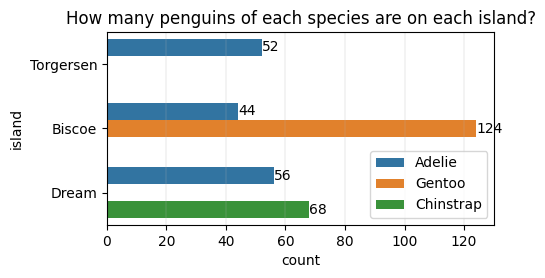

,island,species,count
0,Biscoe,Gentoo,124
1,Dream,Chinstrap,68
2,Dream,Adelie,56
3,Torgersen,Adelie,52
4,Biscoe,Adelie,44


In [11]:
plt.figure(figsize=[5, 2.5])
title = 'How many penguins of each species are on each island?'
plt.title(title)
ax = sns.countplot(y='island', data=df, hue='species')
plt.grid(which='major', axis='x', linewidth=0.2)
plt.legend(loc='lower right')

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

df[['island', 'species']].value_counts().reset_index(name='count')

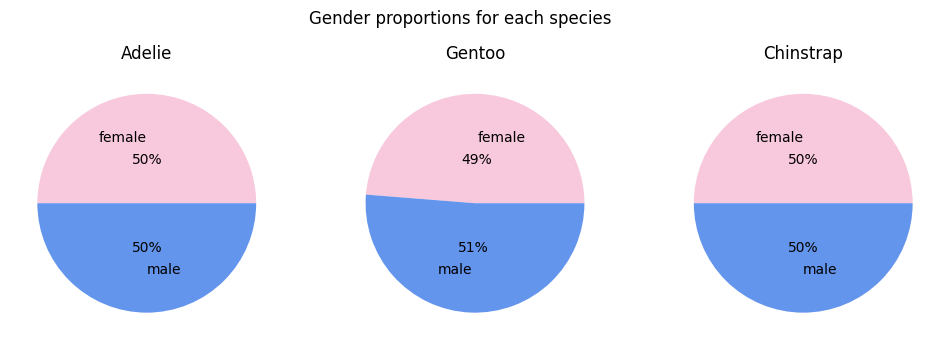

In [12]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(12, 4))
colors = ['#F8C8DC', '#6495ED']
figure.suptitle('Gender proportions for each species')
species_sex_counts = df[['species', 'sex']].value_counts().reset_index(name='count').sort_values(by=['species', 'sex'])

Adelie = species_sex_counts[species_sex_counts['species'] == 'Adelie']
axes[0].set_title('Adelie')
axes[0].pie(Adelie['count'], labels=Adelie['sex'], colors=colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

Gentoo = species_sex_counts[species_sex_counts['species'] == 'Gentoo']
axes[1].set_title('Gentoo')
axes[1].pie(Gentoo['count'], labels=Gentoo['sex'], colors=colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

Chinstrap = species_sex_counts[species_sex_counts['species'] == 'Chinstrap']
axes[2].set_title('Chinstrap')
axes[2].pie(Chinstrap['count'], labels=Chinstrap['sex'], colors=colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

plt.show() 

### 4. Data Preprocessing
[Back to Top](#Penguins) <br>

### 5. ML
[Back to Top](#Penguins) <br>

### 6. Compare Models
[Back to Top](#Penguins) <br>

### 7. Conclusion
[Back to Top](#Penguins) <br>